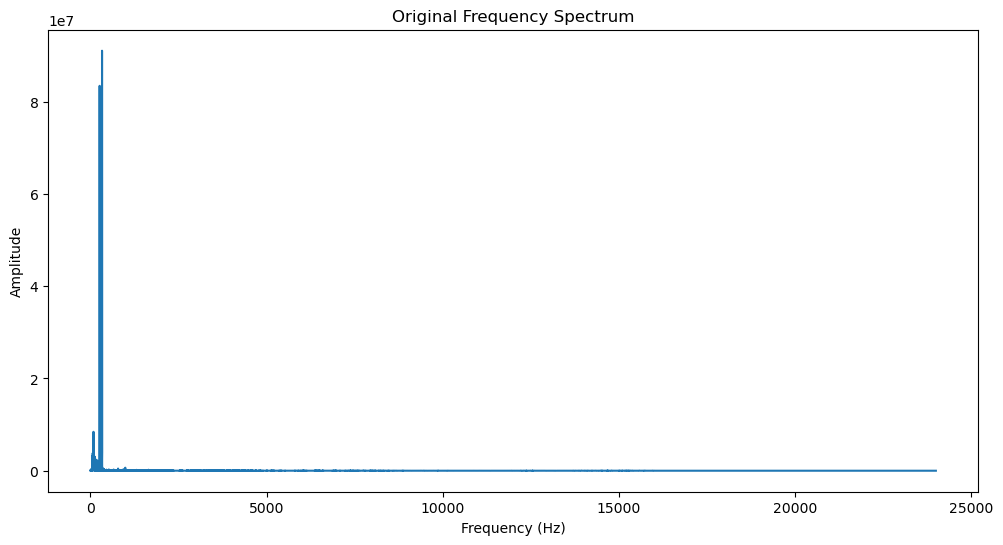

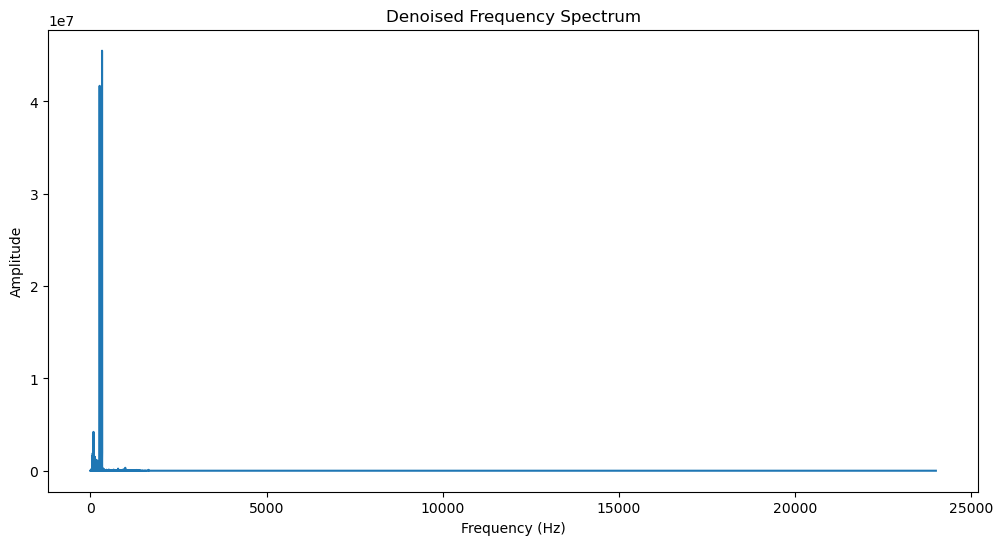

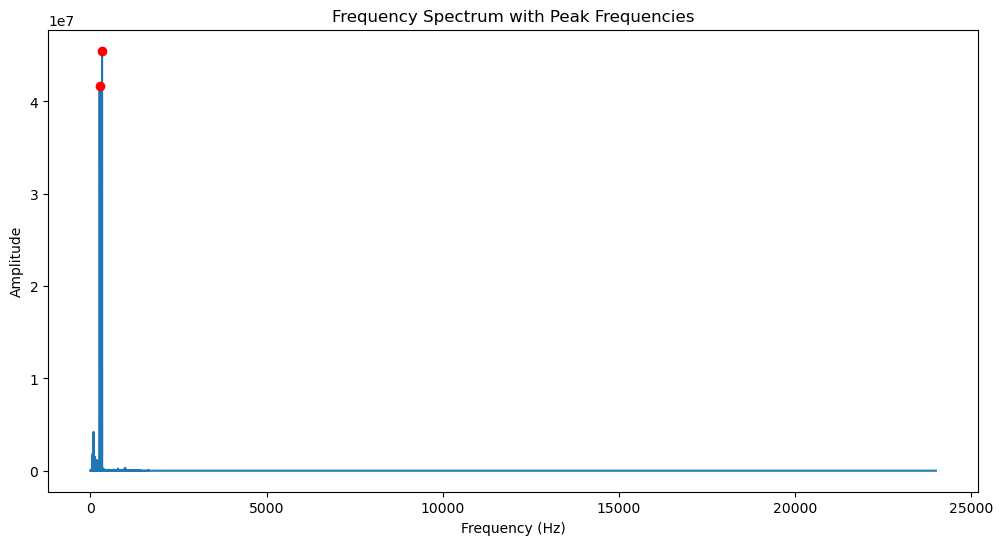

Peak 3 frequencies:
Peak 1:  329.6178343949045 Hz 
Peak 2:  261.6772823779193 Hz 


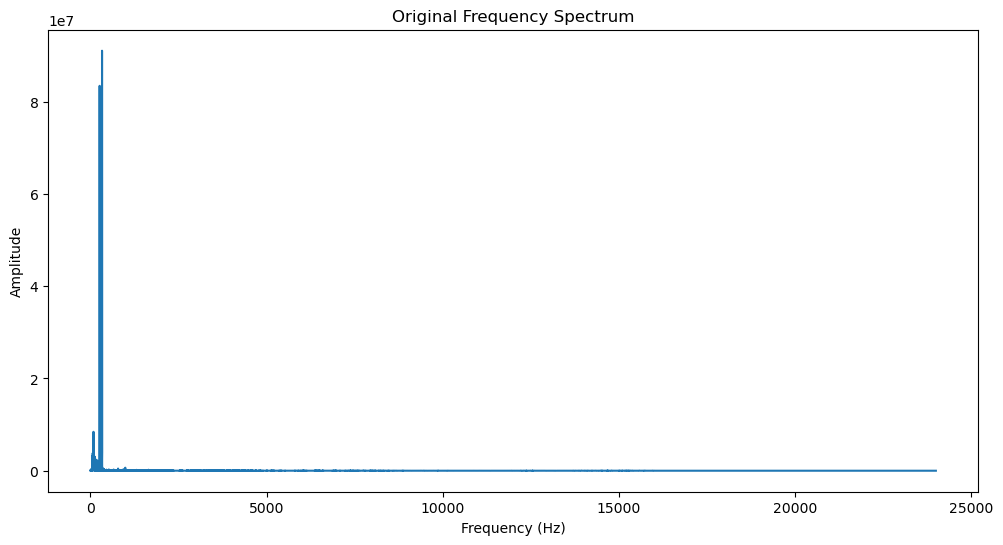

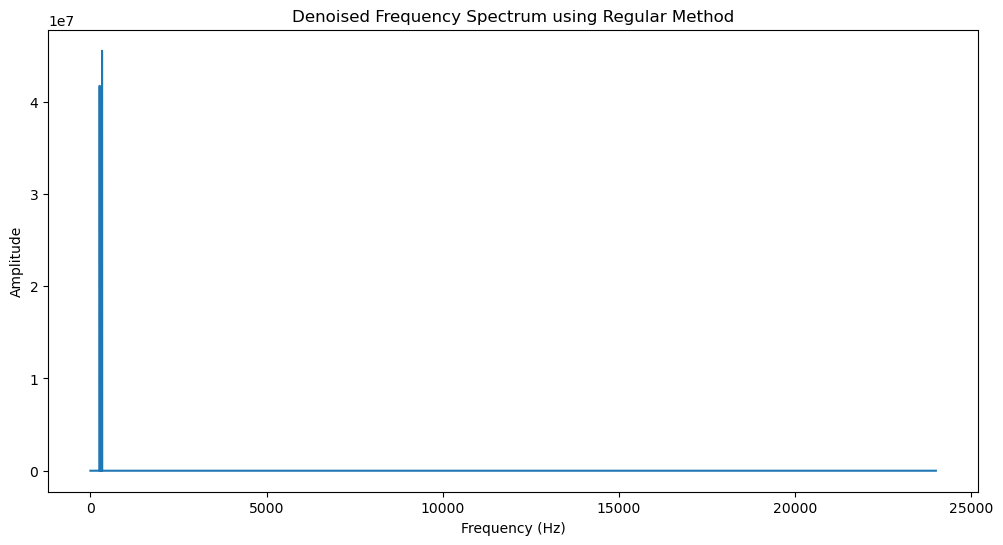

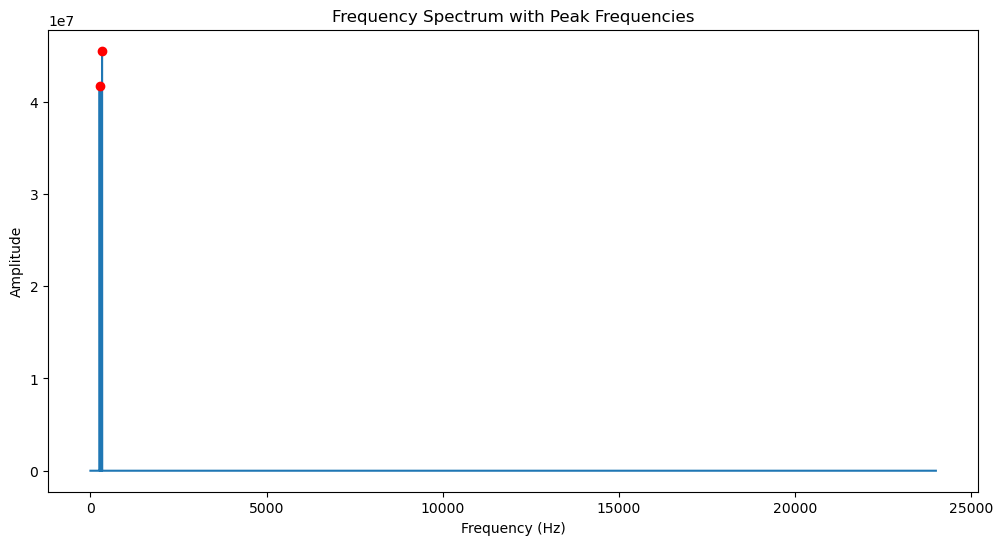

Peak 3 frequencies:
Peak 1:  329.6178343949045 Hz 
Peak 2:  261.6772823779193 Hz 


In [5]:
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from scipy.signal import find_peaks
from IPython.display import Audio
from IPython.display import display

def apply_fft(data, Fs):
    N = len(data)
    fft_result = fft(data)
    freq = np.fft.fftfreq(N, 1/Fs)
    pos_freq = freq[:N//2]
    mag = 2*np.abs(fft_result[:N//2])
    plt.figure(figsize=(12, 6))
    plt.plot(pos_freq,mag)
    plt.title("Original Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.show()
    
    return fft_result, pos_freq, mag

def denoising_Rayleigh(fft_result, Fs):
    N = len(fft_result)
    mag = np.abs(fft_result)
    # Median Absolute Deviation
    median = np.median(mag)
    mad = np.median(np.abs(mag-median))
    
    # Rayleigh Distribution
    b_hat = 2.2299*mad
    threshold = np.sqrt(2*b_hat**2 * np.log(N))
    
    #numpy.where(condition, [x, y, ]/)
    denoised_fft = np.where(mag>threshold, fft_result*(1-threshold/mag),0) #soft thresholding
    
    # Plot
    plt.figure(figsize=(12, 6))
    freq = np.fft.fftfreq(N, 1/Fs)
    pos_freq = freq[:N//2]
    denoised_fft_spec = np.abs(denoised_fft[:N//2])
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title("Denoised Frequency Spectrum")
    plt.plot(pos_freq, denoised_fft_spec)
    plt.show()
    
    # Rescaling
    denoised_audio=np.real(ifft(denoised_fft))
    denoised_audio=np.int16(denoised_audio/np.max(np.abs(denoised_audio))*32767) 
    
    return denoised_fft, denoised_audio

def denoising_manual(fft_result, Fs):
    N = len(fft_result)
    threshold = np.max(np.abs(fft_result)) * 0.1  
    denoised_fft = np.where(np.abs(fft_result)>threshold, fft_result, 0)
    plt.figure(figsize=(12, 6))
    freq = np.fft.fftfreq(N, 1/Fs)
    pos_freq = freq[:N//2]
    denoised_fft_spec = np.abs(denoised_fft[:N//2])  
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title("Denoised Frequency Spectrum using Regular Method")
    plt.plot(pos_freq, denoised_fft_spec) 
    plt.show()
    # Rescaling 
    denoised_audio=np.real(ifft(denoised_fft))
    denoised_audio=np.int16(denoised_audio / np.max(np.abs(denoised_audio)) * 32767) 
    return denoised_fft, denoised_audio

def find_peak_frequencies(pos_freq, mag):
    # Find peaks
    peaks, _ = find_peaks(mag, height=np.max(mag)/10) #Modify divisor 
    peak_mag = mag[peaks]
    top_3_indices = np.argsort(peak_mag)[-3:][::-1] #indices of 3 largest value. Used online source as reference
    top_3_peaks = peaks[top_3_indices]
    top_freq = pos_freq[top_3_peaks]
    top_mag = mag[top_3_peaks]
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(pos_freq, mag)
    plt.plot(top_freq, top_mag,'ro')
    plt.title("Frequency Spectrum with Peak Frequencies")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.show()
    # Print peak frequencies
    print("Peak 3 frequencies:")
    for i, freq in enumerate(top_freq):
        print(f"Peak {i+1}: {abs(freq): } Hz ")
    return top_freq, top_mag

def generate_audio1(filename):
    Fs, data = read(filename)
    fft_result, pos_freq, mag = apply_fft(data, Fs)
    denoised_fft, denoised_audio = denoising_Rayleigh(fft_result, Fs)
    denoised_magnitude = np.abs(denoised_fft[:len(pos_freq)])
    top_3_frequencies, top_3_magnitudes = find_peak_frequencies(pos_freq, denoised_magnitude)
    output_filename = 'denoised_' + filename
    write(output_filename, Fs, denoised_audio)
    return Audio(denoised_audio, rate=Fs)

def generate_audio2(filename):
    Fs, data = read(filename)
    fft_result, pos_freq, mag = apply_fft(data, Fs)
    denoised_fft, denoised_audio = denoising_manual(fft_result, Fs)
    denoised_magnitude = np.abs(denoised_fft[:len(pos_freq)])
    top_3_frequencies, top_3_magnitudes = find_peak_frequencies(pos_freq, denoised_magnitude)
    output_filename = 'denoised_ver_2' + filename
    write(output_filename, Fs, denoised_audio)
    return Audio(denoised_audio, rate=Fs)

Fs, input_audio_data = read('majorthirdwnoise.wav')
input_audio = Audio(input_audio_data, rate=Fs)
audio1 = generate_audio1('majorthirdwnoise.wav')
audio2 = generate_audio2('majorthirdwnoise.wav')

display(input_audio)
display(audio1)
display(audio2)


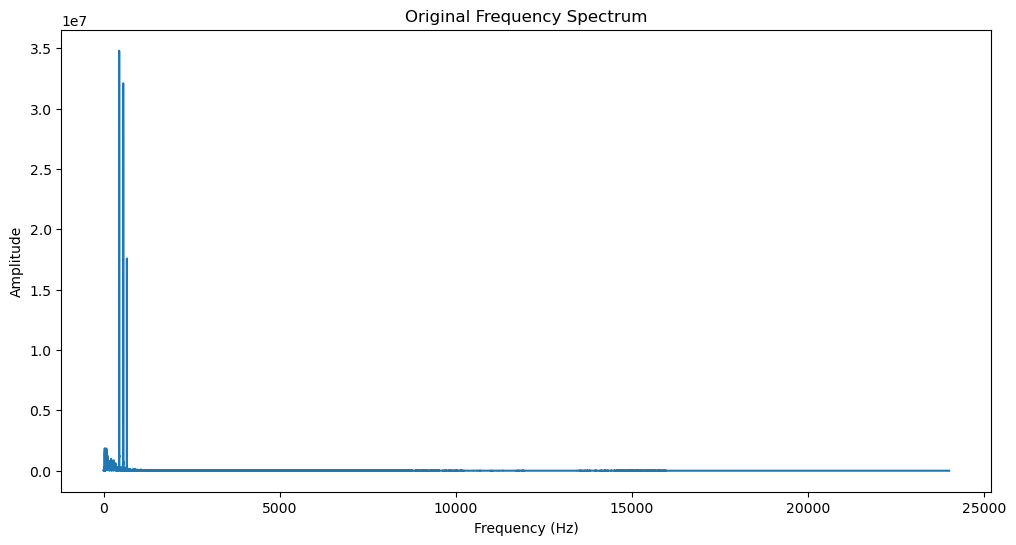

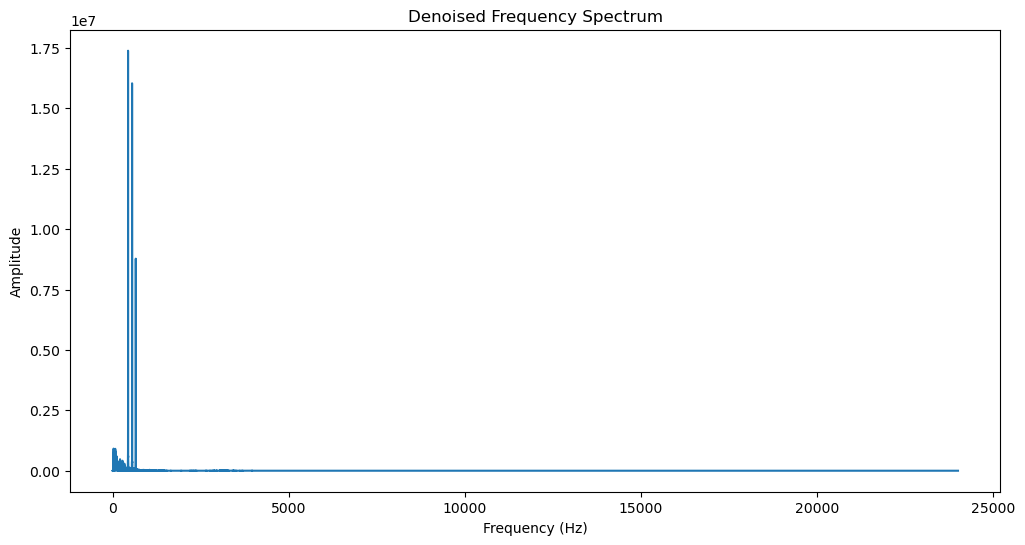

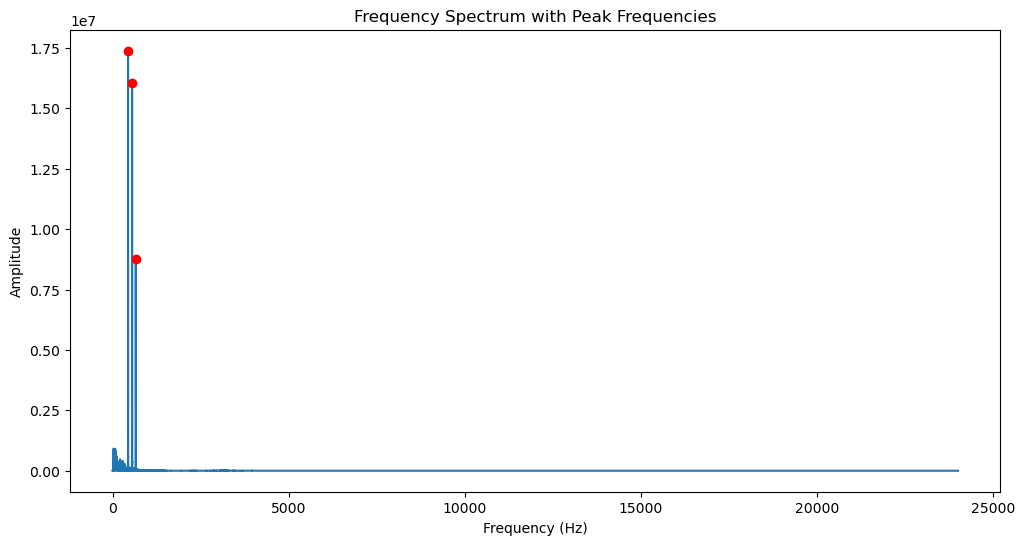

Peak 3 frequencies:
Peak 1:  439.98456194519497 Hz 
Peak 2:  554.3226553454266 Hz 
Peak 3:  659.108452335006 Hz 


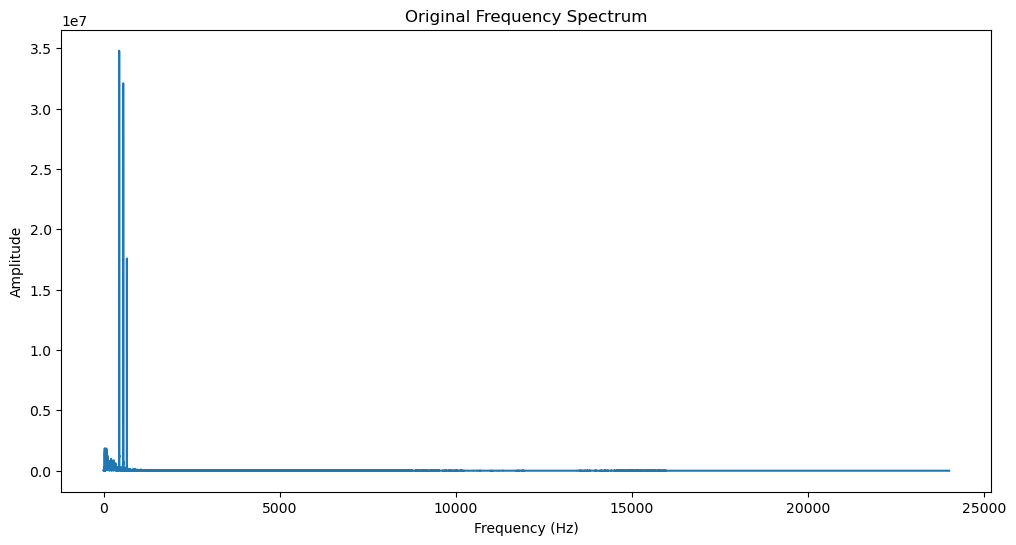

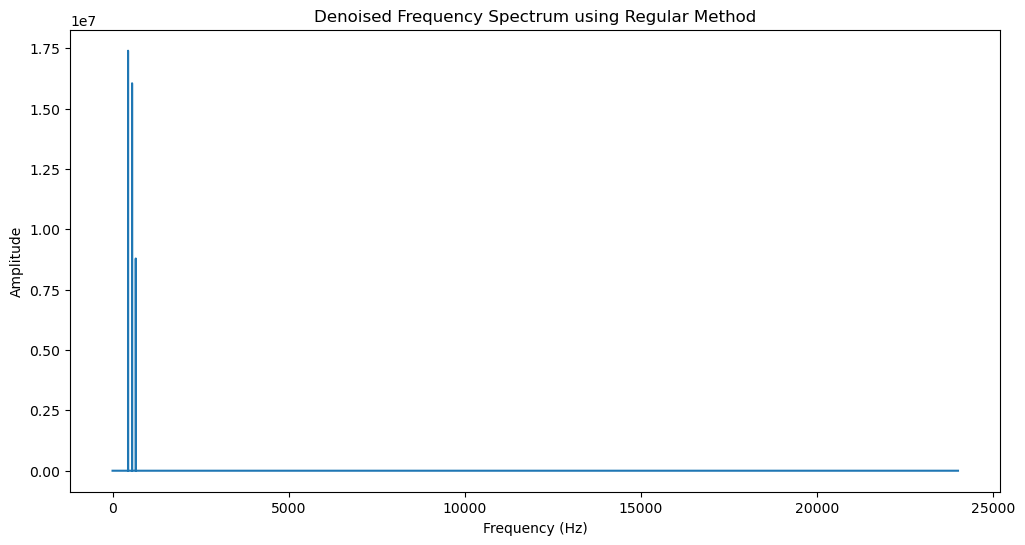

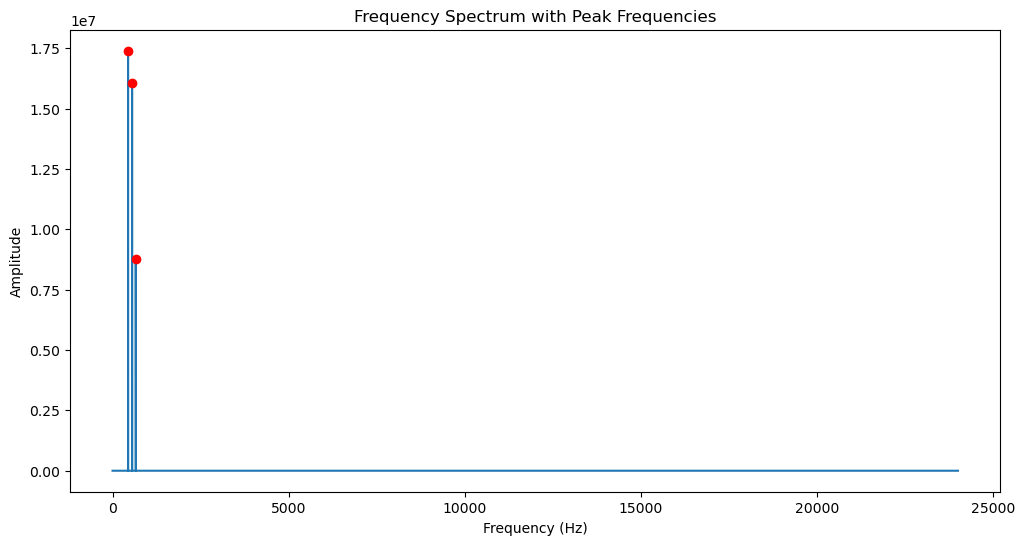

Peak 3 frequencies:
Peak 1:  439.98456194519497 Hz 
Peak 2:  554.3226553454266 Hz 
Peak 3:  659.108452335006 Hz 


In [6]:
Fs, input_audio_data = read('A_major_noise.wav')
input_audio = Audio(input_audio_data, rate=Fs)
audio1 = generate_audio1('A_major_noise.wav')
audio2 = generate_audio2('A_major_noise.wav')

display(input_audio)
display(audio1)
display(audio2)